In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dense,Input,GlobalAvgPool2D
from tensorflow.python.keras import activations


In [2]:
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
def display(feature,label):
    plt.figure(figsize=(10,10))
    for i in range(25):
        idx=np.random.randint(0,feature.shape[0]-1)
        feature1=feature[idx]
        label1=label[idx]
        plt.subplot(5,5,i+1)
        
        plt.title(str(label1))
        plt.tight_layout()
        plt.imshow(feature1,cmap='gray')
        plt.show
        

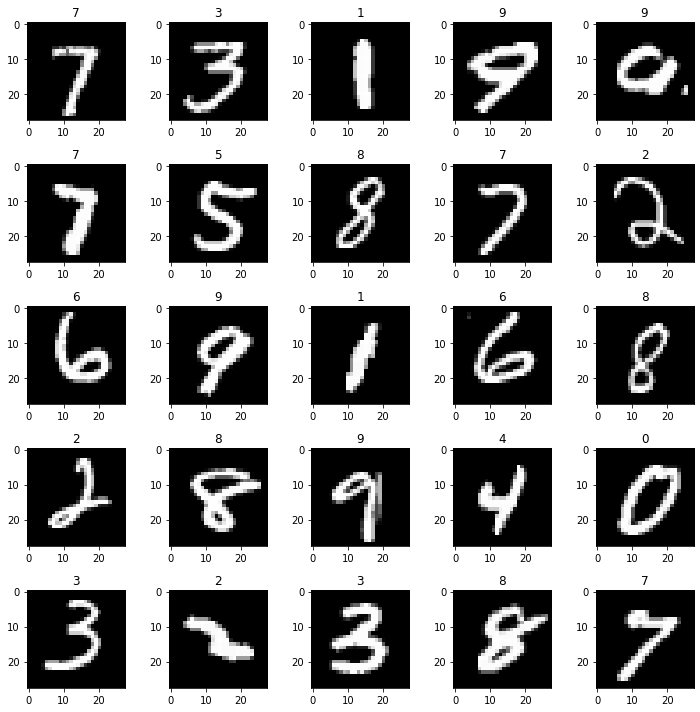

In [6]:
display(x_train,y_train)

In [7]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [8]:
x_train[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
x_test[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

In [11]:
y_train=tf.keras.utils.to_categorical(y_train,10)

In [12]:
y_test=tf.keras.utils.to_categorical(y_test,10)

In [13]:
# def tf_functional_model():
#     my_input = Input(shape=(28,28,1))
#     x = Conv2D(32, (3,3), activation='relu')(my_input)
#     x = Conv2D(64, (3,3), activation='relu')(x)
#     x = MaxPool2D()(x)
#     x = BatchNormalization()(x)

#     x = Conv2D(128, (3,3), activation='relu')(x)
#     x = MaxPool2D()(x)
#     x = BatchNormalization()(x)

#     x = GlobalAvgPool2D()(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dense(10, activation='softmax')(x)

#     model = tf.keras.Model(inputs=my_input, outputs=x)

#     return model

class MycustomModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.Conv1=Conv2D(32,(3,3),activation='relu')
        self.Conv2=Conv2D(64,(3,3),activation='relu')
        self.maxpool1=MaxPool2D()
        self.batch1=BatchNormalization()
    
        self.Conv3=Conv2D(128,(3,3),activation='relu')
        self.maxpool2=MaxPool2D()
        self.batch2=BatchNormalization()
        self.glob=GlobalAvgPool2D()
        self.den1=Dense(54,activation='relu')
        self.den2=Dense(10,activation='softmax')
    
    


    

    def call(self,my_input):
        x=self.Conv1(my_input)
        x=self.Conv2(x)
        x=self.maxpool1(x)
        x=self.batch1(x)
        x=self.Conv3(x)
        x=self.maxpool2(x)
        x=self.glob(x)
        x=self.den1(x)
        x=self.den2(x)
        return x

In [14]:
# model=tf_functional_model()
model=MycustomModel()

In [15]:
# model=tf.keras.Sequential([
#     Input(shape=(28,28,1)),
#     Conv2D(32,(3,3),activation='relu'),
#     Conv2D(64,(3,3),activation='relu'),
#     MaxPool2D(),
#     BatchNormalization(),
    
#     Conv2D(128,(3,3),activation='relu'),
#     MaxPool2D(),
#     BatchNormalization(),
#     GlobalAvgPool2D(),
#     Dense(54,activation='relu'),
#     Dense(10,activation='softmax'),
   
# ])
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics='accuracy')
model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 91s 60ms/step - loss: 0.2571 - accuracy: 0.9216 - val_loss: 0.0886 - val_accuracy: 0.9715
Epoch 2/5
1500/1500 [==============================] - 86s 57ms/step - loss: 0.0868 - accuracy: 0.9737 - val_loss: 0.0694 - val_accuracy: 0.9786
Epoch 3/5
1500/1500 [==============================] - 87s 58ms/step - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.0704 - val_accuracy: 0.9785
Epoch 4/5
1500/1500 [==============================] - 87s 58ms/step - loss: 0.0557 - accuracy: 0.9822 - val_loss: 0.0889 - val_accuracy: 0.9738
Epoch 5/5
1500/1500 [==============================] - 86s 57ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.1061 - val_accuracy: 0.9663


In [16]:
model.evaluate(x_test,y_test,batch_size=64)

157/157 [==============================] - 3s 20ms/step - loss: 0.1068 - accuracy: 0.9668


[0.10675051063299179, 0.9667999744415283]

In [17]:
predict=model.predict(x_test)


In [18]:
predict

array([[9.2432000e-09, 9.8656492e-06, 1.7572835e-07, ..., 9.9994326e-01,
        1.7985521e-10, 4.6091332e-05],
       [1.9577071e-06, 5.4109962e-05, 9.9922705e-01, ..., 1.8159340e-09,
        6.4921337e-06, 1.9797887e-06],
       [4.6845520e-07, 9.9999475e-01, 9.7775469e-08, ..., 1.2702101e-07,
        9.4072085e-08, 1.3800069e-08],
       ...,
       [5.7911362e-12, 2.7308985e-07, 2.9902084e-11, ..., 5.9644547e-09,
        6.3185172e-07, 6.8296333e-07],
       [3.2154783e-06, 3.1104552e-08, 9.9938677e-07, ..., 2.8696969e-12,
        1.0511879e-03, 1.5188873e-06],
       [2.2027198e-06, 2.7609967e-13, 2.0386470e-07, ..., 2.0862623e-16,
        1.1012837e-06, 8.4973898e-08]], dtype=float32)

In [19]:
# class MycustomModel(tf):
#     def __init__(self):
#         super().__init__()
    
    
# #     Input(shape=(28,28,1)),

#     self.Conv1=Conv2D(32,(3,3),activation='relu'),
#     self.Conv2=Conv2D(64,(3,3),activation='relu'),
#     self.maxpool1=MaxPool2D(),
#     self.batch1=BatchNormalization(),
    
#     self.Conv3=Conv2D(128,(3,3),activation='relu'),
#     self.maxpool2=MaxPool2D(),
#     self.batch2=BatchNormalization(),
#     self.glob=GlobalAvgPool2D(),
#     self.den1=Dense(54,activation='relu'),
#     self.den2=Dense(10,activation='softmax'),

#     def call(self,my_input):
#         x=self.Conv1
#         x=self.Conv2
#         x=self.maxpool1
#         x=self.batch1
#         x=self.Conv3
#         x=self.maxpool2
#         x=self.glob
#         x=self.den1
#         x=self.den2
#         return x
    
   

    
    
    